## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [2]:
def z(x, y):
    return x**2 + y**2

In [3]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [4]:
x_grid

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ...,
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [5]:
z_grid = z(x_grid, y_grid)

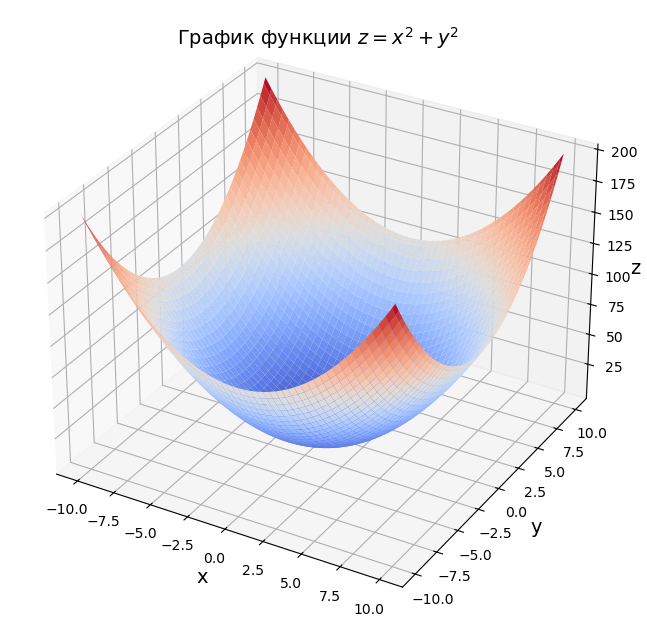

In [6]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:
1) Вычислить градиент функции:
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$
2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$

3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [7]:
def derivative_f(w):
    return 2 * w

In [8]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [9]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [10]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy.

In [11]:
N = 10
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

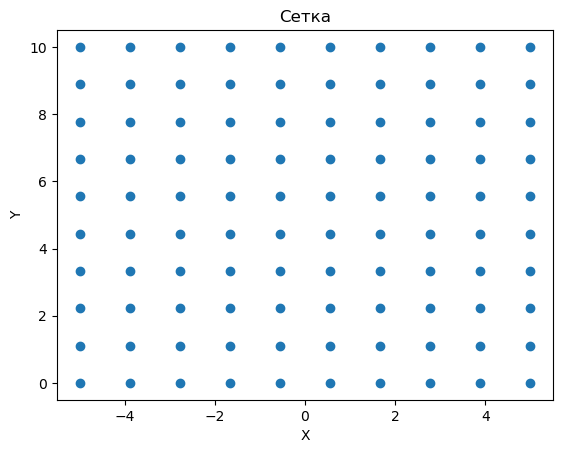

In [12]:
plt.scatter(x_grid, y_grid)
plt.title('Сетка')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [13]:
def f(x, y):
  return x**2 + (y - 5)**2 + 4

In [14]:
z_grid = f(x_grid, y_grid)

In [15]:
z_grid

array([[54.        , 44.12345679, 36.71604938, 31.77777778, 29.30864198,
        29.30864198, 31.77777778, 36.71604938, 44.12345679, 54.        ],
       [44.12345679, 34.24691358, 26.83950617, 21.90123457, 19.43209877,
        19.43209877, 21.90123457, 26.83950617, 34.24691358, 44.12345679],
       [36.71604938, 26.83950617, 19.43209877, 14.49382716, 12.02469136,
        12.02469136, 14.49382716, 19.43209877, 26.83950617, 36.71604938],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716, 21.90123457, 31.77777778],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

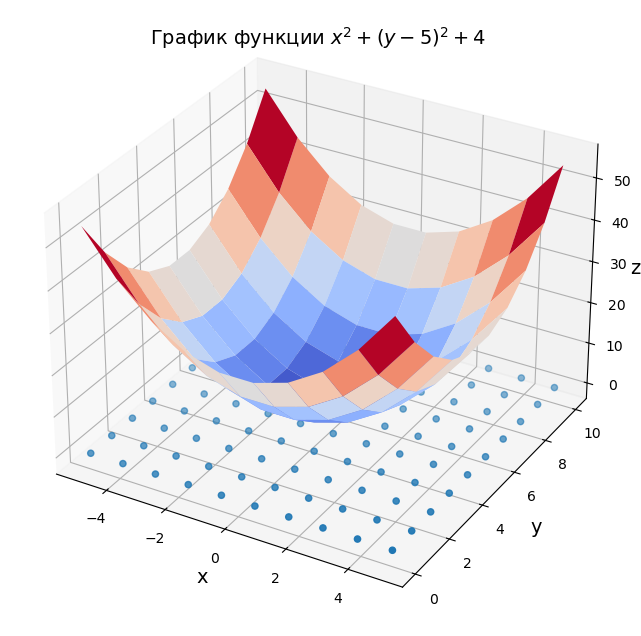

In [16]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')
ax.scatter3D(x_grid, y_grid, np.zeros(x_grid.shape))

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

In [17]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

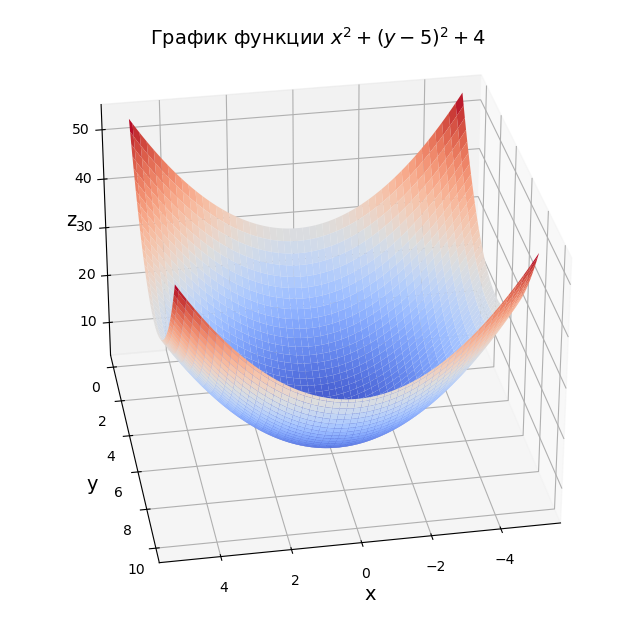

In [18]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
ax.view_init(elev=30, azim=80)
plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

In [19]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)

x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

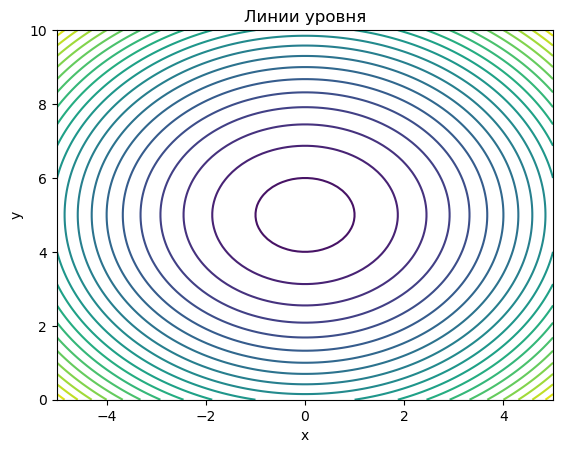

In [20]:
plt.contour(x_grid, y_grid, z_grid, levels = 20)
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

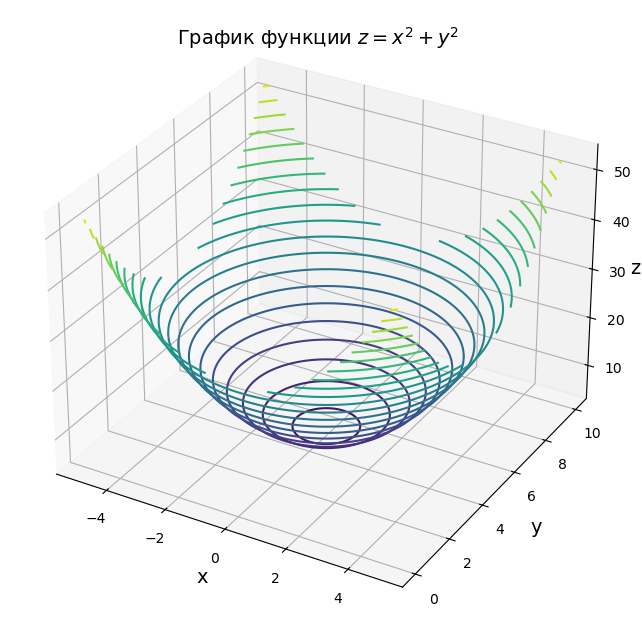

In [21]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.contour(x_grid, y_grid, z_grid, levels = 20)
ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
#ax.view_init(elev=0, azim=0)
plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

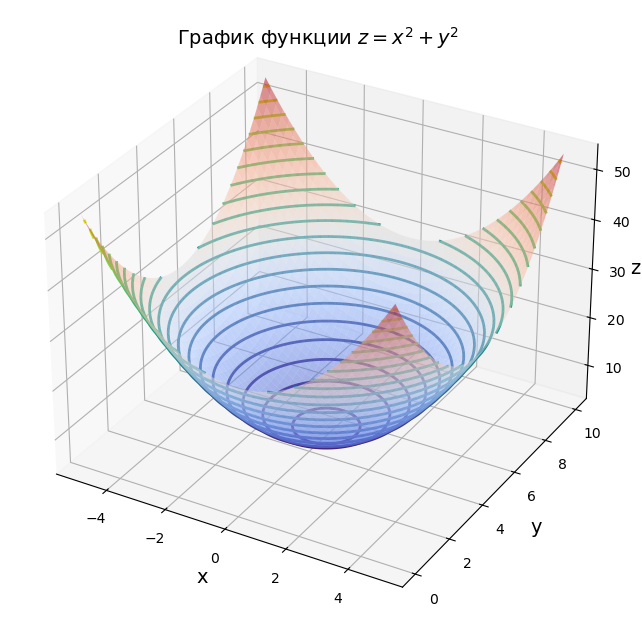

In [22]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.5)
ax.contour(x_grid, y_grid, z_grid, levels = 20, linewidths=2)
ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
#ax.view_init(elev=0, azim=0)
plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [23]:
def f(w):
  return (w - 3)**2

def def_f(w):
  return 2*(w - 3)

In [24]:
f(np.random.uniform(-10,10))

4.213899753746181

In [25]:
def_f(np.random.uniform(-10,10))

10.860000666966947

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

In [26]:
def GD_1d(derivative, start_point, learning_rate, num_steps):
    x_values = np.zeros(num_steps)
    x = start_point
    for i in range(num_steps):
        x_values[i] = x
        x = x - learning_rate * derivative(x)
    
    return x, x_values

def example_derivative(x):
    return 2 * (x - 3)

start_point = 0
learning_rate = 0.1
num_steps = 20
minimum_point, all_x_values = GD_1d(example_derivative, start_point, learning_rate, num_steps)
print(f"Точка минимума: {minimum_point}")
print("Значения x на каждом шаге градиентного спуска:")
print(all_x_values)


Точка минимума: 2.9654123548617948
Значения x на каждом шаге градиентного спуска:
[0.         0.6        1.08       1.464      1.7712     2.01696
 2.213568   2.3708544  2.49668352 2.59734682 2.67787745 2.74230196
 2.79384157 2.83507326 2.8680586  2.89444688 2.91555751 2.93244601
 2.9459568  2.95676544]


### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

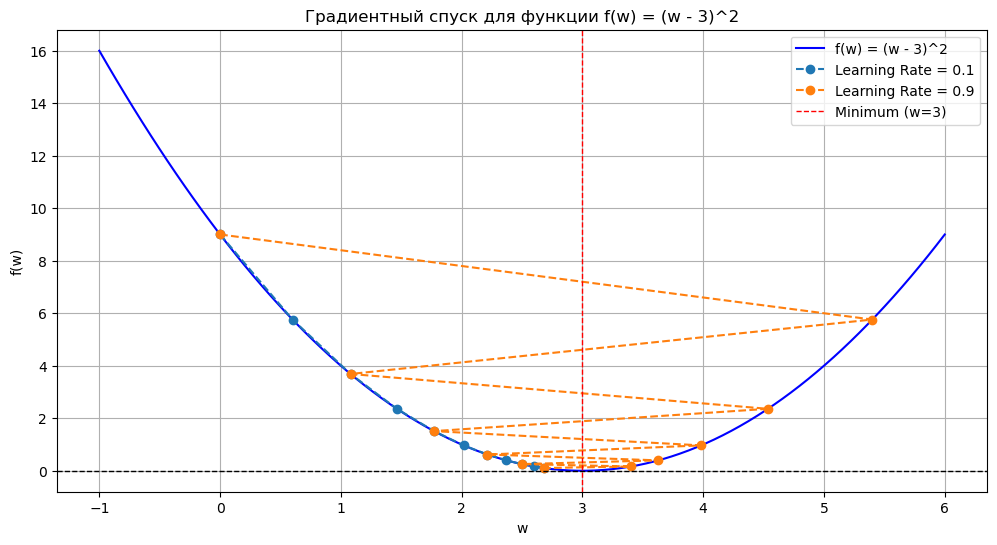

In [27]:
def f(w):
    return (w - 3)**2

def f_prime(w):
    return 2*(w - 3)
    
def gradient_descent(starting_w, learning_rate, num_steps):
    w_values = [starting_w]
    for i in range(num_steps):
        grad = f_prime(w_values[-1]) 
        next_w = w_values[-1] - learning_rate * grad
        w_values.append(next_w)
    return w_values
    
def plot_GD_1d(f, learning_rates, starting_w=0, num_steps=10):
    w = np.linspace(-1, 6, 100)
    f_values = f(w)

    
    plt.figure(figsize=(12, 6))
    plt.plot(w, f_values, label='f(w) = (w - 3)^2', color='blue')
    plt.title('Градиентный спуск для функции f(w) = (w - 3)^2')
    plt.xlabel('w')
    plt.ylabel('f(w)')

    
    for learning_rate in learning_rates:
        w_values = gradient_descent(starting_w, learning_rate, num_steps)
        f_values_steps = f(np.array(w_values)) 
        plt.plot(w_values, f_values_steps, 'o--', label=f'Learning Rate = {learning_rate}')

    
    plt.axhline(0, color='black', lw=1, ls='--')
    plt.axvline(3, color='red', lw=1, ls='--', label='Minimum (w=3)')
    plt.legend()
    plt.grid()
    plt.show()


plot_GD_1d(f, learning_rates=[0.1, 0.9], starting_w=0, num_steps=10)


### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

In [28]:
def F(w1, w2):
    return w1**2 + (w2 - 3)**2 + 1

def gradient(w1, w2):
    dF_w1 = 2 * w1
    dF_w2 = 2 * (w2 - 3)
    return np.array([dF_w1, dF_w2])

np.random.seed(0)
w1_random = np.random.rand() * 10
w2_random = np.random.rand() * 10
value = F(w1_random, w2_random)
grad = gradient(w1_random, w2_random)
print(f"Случайная точка: w1 = {w1_random}, w2 = {w2_random}")
print(f"Значение функции F(w1, w2): {value}")
print(f"Градиент функции: {grad}")


Случайная точка: w1 = 5.4881350392732475, w2 = 7.151893663724195
Значение функции F(w1, w2): 48.35784720417189
Градиент функции: [10.97627008  8.30378733]


### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

In [29]:
def F(w1, w2):
    return w1**2 + (w2 - 3)**2 + 1

def gradient(w):
    dF_w1 = 2 * w[0]
    dF_w2 = 2 * (w[1] - 3)
    return np.array([dF_w1, dF_w2])

def GD_2d(gradient, starting_point, learning_rate, num_iterations):
    w = np.array(starting_point, dtype=float)
    for i in range(num_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
    return w

starting_point = [10.0, 10.0]
learning_rate = 0.1
num_iterations = 100
minimum_point = GD_2d(gradient, starting_point, learning_rate, num_iterations)
minimum_value = F(minimum_point[0], minimum_point[1])
print(f"Точка минимума: w1 = {minimum_point[0]}, w2 = {minimum_point[1]}")
print(f"Значение функции в точке минимума: {minimum_value}")


Точка минимума: w1 = 2.0370359763344878e-09, w2 = 3.000000001425925
Значение функции в точке минимума: 1.0


### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

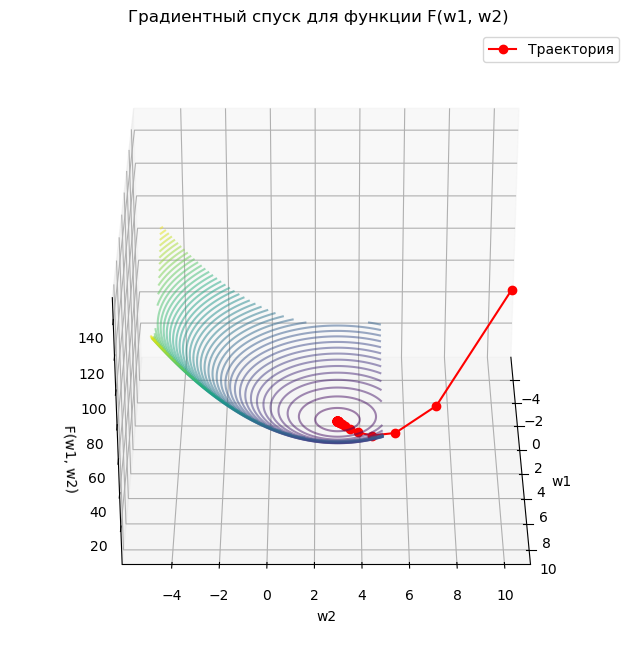

In [30]:
from mpl_toolkits.mplot3d import Axes3D


def F(w1, w2):
    return w1 ** 2 + (w2 - 3) ** 2 + 1

def gradient(w):
    dF_w1 = 2 * w[0]
    dF_w2 = 2 * (w[1] - 3)
    return np.array([dF_w1, dF_w2])

def GD_2d(gradient, starting_point, learning_rate, num_iterations):
    w = np.array(starting_point, dtype=float)
    path = [w.copy()]
    for i in range(num_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        path.append(w.copy())
    return np.array(path)

def plot_GD_2d(F, starting_point, learning_rate, num_iterations):
    w1_values = np.linspace(-5, 5, 100)
    w2_values = np.linspace(-5, 5, 100)
    W1, W2 = np.meshgrid(w1_values, w2_values)
    Z = F(W1, W2)
    path = GD_2d(gradient, starting_point, learning_rate, num_iterations)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(W1, W2, Z, 50, cmap='viridis', alpha=0.5)
    ax.plot(path[:, 0], path[:, 1], F(path[:, 0], path[:, 1]), marker='o', color='red', label='Траектория')
    ax.view_init(azim=0, elev=30)
    ax.set_title("Градиентный спуск для функции F(w1, w2)")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_zlabel("F(w1, w2)")
    ax.legend()
    plt.show()
starting_point = [10.0, 10.0]
learning_rate = 0.2
num_iterations = 50
plot_GD_2d(F, starting_point, learning_rate, num_iterations)


### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

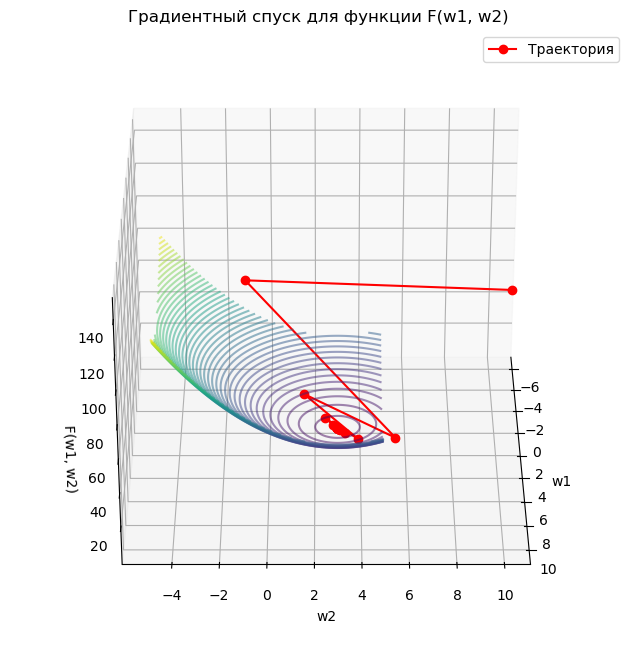

In [31]:
from mpl_toolkits.mplot3d import Axes3D

def F(w1, w2):
    return w1 ** 2 + (w2 - 3) ** 2 + 1

def gradient(w):
    dF_w1 = 2 * w[0]
    dF_w2 = 2 * (w[1] - 3)
    return np.array([dF_w1, dF_w2])

def GD_2d(gradient, starting_point, learning_rate, num_iterations):
    w = np.array(starting_point, dtype=float)
    path = [w.copy()]
    for i in range(num_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        path.append(w.copy())
    return np.array(path)

def plot_GD_2d(F, starting_point, learning_rate, num_iterations):
    w1_values = np.linspace(-5, 5, 100)
    w2_values = np.linspace(-5, 5, 100)
    W1, W2 = np.meshgrid(w1_values, w2_values)
    Z = F(W1, W2)
    path = GD_2d(gradient, starting_point, learning_rate, num_iterations)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(W1, W2, Z, 50, cmap='viridis', alpha=0.5)
    ax.plot(path[:, 0], path[:, 1], F(path[:, 0], path[:, 1]), marker='o', color='red', label='Траектория')
    ax.view_init(azim=0, elev=30)
    ax.set_title("Градиентный спуск для функции F(w1, w2)")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_zlabel("F(w1, w2)")
    ax.legend()
    plt.show()
starting_point = [10.0, 10.0]  # Начальная точка
learning_rate = 0.8  # Скорость обучения
num_iterations = 50  # Количество итераций
plot_GD_2d(F, starting_point, learning_rate, num_iterations)


### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

In [33]:
def F(w):
    w1, w2, w3, w4 = w
    return w1 ** 2 + (w2 + 5 * w3) ** 2 + (2 * w4 - 3) ** 2 + 6

def gradient(w):
    w1, w2, w3, w4 = w
    dF_dw1 = 2 * w1
    dF_dw2 = 2 * (w2 + 5 * w3)
    dF_dw3 = 10 * (w2 + 5 * w3)
    dF_dw4 = 4 * (2 * w4 - 3)
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])

def GD_nd(starting_point, learning_rate, max_iter):
    w = np.array(starting_point)
    for _ in range(max_iter):
        grad = gradient(w)
        w = w - learning_rate * grad
    return w

starting_point = [0, 0, 0, 0]
learning_rate = 0.001
max_iter = 10000
minimum_point = GD_nd(starting_point, learning_rate, max_iter)
print("Точка минимума:", minimum_point)
print("Значение функции в точке минимума:", F(minimum_point))


Точка минимума: [0.  0.  0.  1.5]
Значение функции в точке минимума: 6.0


### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

In [34]:
def F(w, a, b):
    w1, w2, w3, w4 = w
    return a * w1 ** 2 + (w2 + 5 * w3 + b) ** 2 + (2 * w4 - 3) ** 2 + 6

def gradient(w, a, b):
    w1, w2, w3, w4 = w
    dF_dw1 = 2 * a * w1
    dF_dw2 = 2 * (w2 + 5 * w3 + b)
    dF_dw3 = 10 * (w2 + 5 * w3 + b)
    dF_dw4 = 4 * (2 * w4 - 3)
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])

def GD(starting_point, learning_rate, max_iter, a, b):
    w = np.array(starting_point)
    for _ in range(max_iter):
        grad = gradient(w, a, b)
        w = w - learning_rate * grad
    return w

starting_point = [0, 0, 0, 0]
learning_rate = 0.001
max_iter = 10000
a1, b1 = 5, -7
minimum_point_1 = GD(starting_point, learning_rate, max_iter, a1, b1)
print("Точка минимума для a=5, b=-7:", minimum_point_1)
print("Значение функции в точке минимума:", F(minimum_point_1, a1, b1))
a2, b2 = -2, 3
minimum_point_2 = GD(starting_point, learning_rate, max_iter, a2, b2)
print("Точка минимума для a=-2, b=3:", minimum_point_2)
print("Значение функции в точке минимума:", F(minimum_point_2, a2, b2))


Точка минимума для a=5, b=-7: [0.         0.26923077 1.34615385 1.5       ]
Значение функции в точке минимума: 6.0
Точка минимума для a=-2, b=3: [ 0.         -0.11538462 -0.57692308  1.5       ]
Значение функции в точке минимума: 6.0


### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

In [39]:
class GradientDescent:
    def __init__(self, max_iter=10000, learning_rate=0.001):
        self.w = None
        self.max_iter_ = max_iter
        self.learning_rate = learning_rate

    def gradient_F(self, w, a, b):
        """Вычисление градиента функции F."""
        w1, w2, w3, w4 = w
        dF_dw1 = 2 * a * w1
        dF_dw2 = 2 * (w2 + 5 * w3 + b)
        dF_dw3 = 10 * (w2 + 5 * w3 + b)
        dF_dw4 = 4 * (2 * w4 - 3)
        return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])

    def GD(self, a, b, w_start):
        """Метод градиентного спуска."""
        self.w = w_start
        for _ in range(self.max_iter_):
            grad = self.gradient_F(self.w, a, b)
            self.w = self.w - self.learning_rate * grad

    def fit(self, a, b):
        """Обучение модели с заданными параметрами a и b."""
        w_start = np.zeros(4)
        self.GD(a, b, w_start)

    def get_minimum(self):
        """Получить точку минимума."""
        return self.w

    def value_at_minimum(self, a, b):
        """Вычислить значение функции F в найденной точке минимума."""
        w1, w2, w3, w4 = self.w
        return a * w1**2 + (w2 + 5 * w3 + b)**2 + (2 * w4 - 3)**2 + 6

if __name__ == "__main__":
    a1, b1 = 5, -7
    gd1 = GradientDescent(max_iter=10000, learning_rate=0.001)
    gd1.fit(a1, b1)
    print("Точка минимума для a=5, b=-7:", gd1.get_minimum())
    print("Значение функции в точке минимума:", gd1.value_at_minimum(a1, b1))
    a2, b2 = -2, 3
    gd2 = GradientDescent(max_iter=10000, learning_rate=0.001)
    gd2.fit(a2, b2)
    print("Точка минимума для a=-2, b=3:", gd2.get_minimum())
    print("Значение функции в точке минимума:", gd2.value_at_minimum(a2, b2))


Точка минимума для a=5, b=-7: [0.         0.26923077 1.34615385 1.5       ]
Значение функции в точке минимума: 6.0
Точка минимума для a=-2, b=3: [ 0.         -0.11538462 -0.57692308  1.5       ]
Значение функции в точке минимума: 6.0


### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла.

In [38]:
class GradientDescent_err:
    def __init__(self, learning_rate=0.01, error_reduction=0.0000001):
        self.learning_rate = learning_rate
        self.error_reduction = error_reduction
        self.steps = 0

    def GD(self, func, grad_func, initial_value):
        current_value = initial_value
        previous_value = None

        while True:
            previous_value = current_value
            
            current_value -= self.learning_rate * grad_func(current_value)
            self.steps += 1
            
            if previous_value is not None:
                absolute_error = abs(current_value - previous_value)
                if absolute_error < self.error_reduction:
                    break
        
        return current_value

    def get_steps(self):
        return self.steps

if __name__ == "__main__":
    a1, b1 = 5, -7
    gd1 = GradientDescent(max_iter=10000, learning_rate=0.001)
    gd1.fit(a1, b1)
    print("Точка минимума для a=5, b=-7:", gd1.get_minimum())
    print("Значение функции в точке минимума:", gd1.value_at_minimum(a1, b1))
    a2, b2 = -2, 3
    gd2 = GradientDescent(max_iter=10000, learning_rate=0.001)
    gd2.fit(a2, b2)
    print("Точка минимума для a=-2, b=3:", gd2.get_minimum())
    print("Значение функции в точке минимума:", gd2.value_at_minimum(a2, b2))


Точка минимума для a=5, b=-7: [0.         0.26923077 1.34615385 1.5       ]
Значение функции в точке минимума: 6.0
Точка минимума для a=-2, b=3: [ 0.         -0.11538462 -0.57692308  1.5       ]
Значение функции в точке минимума: 6.0
